# Parte 1

## Importacion de librerias

In [1]:
import xlrd

In [2]:
import requests

In [3]:
import urllib

In [4]:
import datetime

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn

In [9]:
import numpy

## Lectura de archivo xls

In [10]:
#link='https://github.com/lprone/cuandoLlueve/blob/master/Analisis%20exploratorio%20y%20curacion%20de%20datos/LLUVIAS.xls?raw=true'
#request = urllib.request.urlretrieve(link) 
book = xlrd.open_workbook('LLUVIAS.xls')  

In [11]:
sheets = book.sheet_names()

## Visualización de datos del archivo xls

In [12]:
sheets

['LLUVIAS']

In [13]:
active_sheet = book.sheet_by_name(sheets[0])

In [14]:
active_sheet.nrows

587

In [15]:
active_sheet.ncols

46

## Definición de funciones auxiliares

In [16]:
# TO-DO

## Procesamiento de archivo xls

In [17]:
day = 0
month = '' 
year = 0

# TO-DO Definir el valor correcto para estas variables
n_rows = 
n_columns =

date_array = []
rain_array = []

for row_index in range(n_rows):
    for col_index in range(n_columns):
        cell_data = active_sheet.cell(row_index, col_index).value
        date = ""
        rain = 0
        
        # TO-DO Analizar cell_data y dar valor a las variables date y rain
        
        date_array.append(date)            
        rain_array.append(rain)           

SyntaxError: invalid syntax (<ipython-input-17-105060147bb8>, line 6)

In [ ]:
matrix = np.array([date_array,rain_array])
matrix = matrix.transpose()

## Generación de archivo csv

In [ ]:
# TO-DO Modificar parámetros para generar correctamente el archivo csv
df = pd.DataFrame(matrix)
df.to_csv("rain.csv")

--------------------------------------------------------------------------------------------------------------------------------------------------------

## Importación de archivo csv

In [ ]:
# TO-DO Modificar parámetros para leer correctamente el archivo csv
lluvias = pd.read_csv("rain.csv")

## Procesamiento de archivo csv

In [ ]:
lluvias.plot(figsize=(30,10))

In [ ]:
lluvias.describe()

In [ ]:
lluvias.head()

# Actividades

1) Completar el procesamiento del archivo xls.

2) Generar un nuevo archivo csv con los datos procesados.

3) Importar el nuevo archivo csv teniendo en cuenta tipos de dato correctos para cada columna, indices, etc.

4) Analizar y dar valor a datos faltantes/outliers.

# Parte 2 (Análisis de Dataset complementario)

In [10]:
datos_junin = pd.read_csv("1758536_junin.csv")

In [11]:
datos_junin.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,ARM00087548,"JUNIN, AR",-34.546,-60.931,79.9,1967-05-05,NaN,NaN,NaN,NaN,15.3,"H,,S",25.0,",,S",11.1,",,S"
1,ARM00087548,"JUNIN, AR",-34.546,-60.931,79.9,1967-05-13,NaN,NaN,NaN,NaN,12.4,"H,,S",25.0,",,S",6.1,",,S"
2,ARM00087548,"JUNIN, AR",-34.546,-60.931,79.9,1967-06-01,5.1,",,S",NaN,NaN,8.9,"H,,S",NaN,NaN,7.8,",,S"
3,ARM00087548,"JUNIN, AR",-34.546,-60.931,79.9,1967-06-02,2.0,",,S",NaN,NaN,9.7,"H,,S",12.2,",,S",8.9,",,S"
4,ARM00087548,"JUNIN, AR",-34.546,-60.931,79.9,1967-06-03,0.0,",,S",NaN,NaN,3.9,"H,,S",11.1,",,S",-2.2,",,S"


In [12]:
datos_junin.shape

(17308, 16)

In [13]:
datos_junin.dtypes

STATION             object
NAME                object
LATITUDE           float64
LONGITUDE          float64
ELEVATION          float64
DATE                object
PRCP               float64
PRCP_ATTRIBUTES     object
SNWD               float64
SNWD_ATTRIBUTES     object
TAVG               float64
TAVG_ATTRIBUTES     object
TMAX               float64
TMAX_ATTRIBUTES     object
TMIN               float64
TMIN_ATTRIBUTES     object
dtype: object

In [14]:
types={
    'STATION': str,
    'NAME': str,
    'PRCP_ATTRIBUTES': str,
    'SNWD_ATTRIBUTES': str,
    'TAVG_ATTRIBUTES': str,
    'TMAX_ATTRIBUTES': str,
    'TMIN_ATTRIBUTES': str,
}
datos_junin_types = pd.read_csv("1758536_junin.csv", parse_dates=["DATE"], dtype=types, usecols= [ 'DATE',
                                                                                                  'PRCP', 'PRCP_ATTRIBUTES',
                                                                                                  'SNWD', 'SNWD_ATTRIBUTES',
                                                                                                  'TAVG', 'TAVG_ATTRIBUTES',
                                                                                                  'TMAX', 'TMAX_ATTRIBUTES',
                                                                                                  'TMIN', 'TMIN_ATTRIBUTES'])
station_metadata_value = '''{} [ID={}, LAT={:f}, LONG={:f}, ELEV={:f}]'''.format(datos_junin.at[1, 'NAME'], 
                datos_junin.at[1, 'STATION'], 
                datos_junin.at[1, 'LATITUDE'], 
                round(datos_junin.at[1, 'LONGITUDE'], 3),  
                datos_junin.at[1, 'ELEVATION'])


datos_junin_types['STATION'] = station_metadata_value
datos_junin_types.dtypes

DATE               datetime64[ns]
PRCP                      float64
PRCP_ATTRIBUTES            object
SNWD                      float64
SNWD_ATTRIBUTES            object
TAVG                      float64
TAVG_ATTRIBUTES            object
TMAX                      float64
TMAX_ATTRIBUTES            object
TMIN                      float64
TMIN_ATTRIBUTES            object
STATION                    object
dtype: object

In [15]:
datos_junin_types

,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,STATION
0,1967-05-05,NaN,NaN,NaN,NaN,15.3,"H,,S",25.0,",,S",11.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
1,1967-05-13,NaN,NaN,NaN,NaN,12.4,"H,,S",25.0,",,S",6.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
2,1967-06-01,5.1,",,S",NaN,NaN,8.9,"H,,S",NaN,NaN,7.8,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
3,1967-06-02,2.0,",,S",NaN,NaN,9.7,"H,,S",12.2,",,S",8.9,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
4,1967-06-03,0.0,",,S",NaN,NaN,3.9,"H,,S",11.1,",,S",-2.2,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
5,1967-06-04,NaN,NaN,NaN,NaN,1.4,"H,,S",10.0,",,S",-5.0,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
6,1967-06-05,NaN,NaN,NaN,NaN,3.9,"H,,S",NaN,NaN,1.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
7,1967-06-06,NaN,NaN,NaN,NaN,5.6,"H,,S",NaN,NaN,NaN,NaN,"JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
8,1967-06-10,NaN,NaN,NaN,NaN,3.9,"H,,S",15.0,",,S",-2.8,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
9,1967-06-11,NaN,NaN,NaN,NaN,4.3,"H,,S",13.9,",,S",0.0,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."


Como se puede observar en el resumen anterior la columna de fecha se parseo en formato datetime y los valores numericos fueron representados automaticamente en formato float, asi como tambien se indico formato para las columnas con tipo objeto que fueran tipo string. Finalmente las columnas 'STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION' se combinaron en una sola como metadata de las estancion para la cual se tomaron todas las medidas, ya que no suman un valor a las estadisticas que se pretenden analizar.

In [16]:
datos_junin_types.describe(include='all')

,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,STATION
count,17308,9744.000000,9744,20.00000,20,17308.000000,17308,7162.000000,7162,14318.000000,14318,17308
unique,17308,NaN,2,NaN,2,NaN,1,NaN,2,NaN,2,1
top,1967-09-20 00:00:00,NaN,",,S",NaN,",,S",NaN,"H,,S",NaN,",,S",NaN,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
freq,1,NaN,6601,NaN,17,NaN,17308,NaN,7160,NaN,14316,17308
first,1967-05-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.008087,NaN,145.10000,NaN,16.123995,NaN,23.726236,NaN,9.855559,NaN,NaN
std,NaN,12.347039,NaN,320.96268,NaN,5.852709,NaN,6.544230,NaN,6.148457,NaN,NaN
min,NaN,0.000000,NaN,10.00000,NaN,-0.200000,NaN,6.400000,NaN,-8.000000,NaN,NaN
25%,NaN,0.000000,NaN,10.00000,NaN,11.600000,NaN,18.600000,NaN,5.200000,NaN,NaN


Como se puede observar en el resumen anterior, la columna SNWD (Snow depth) solo posee 20 mediciones de un total de 17308 lo que representa menos de 1% de las mediciones por lo que se decide excluirla junto con sus atributos del nuevo dataset conformado.

In [17]:
df_junin = datos_junin_types.drop(['SNWD', 'SNWD_ATTRIBUTES'], axis=1)
df_junin

,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,STATION
0,1967-05-05,NaN,NaN,15.3,"H,,S",25.0,",,S",11.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
1,1967-05-13,NaN,NaN,12.4,"H,,S",25.0,",,S",6.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
2,1967-06-01,5.1,",,S",8.9,"H,,S",NaN,NaN,7.8,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
3,1967-06-02,2.0,",,S",9.7,"H,,S",12.2,",,S",8.9,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
4,1967-06-03,0.0,",,S",3.9,"H,,S",11.1,",,S",-2.2,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
5,1967-06-04,NaN,NaN,1.4,"H,,S",10.0,",,S",-5.0,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
6,1967-06-05,NaN,NaN,3.9,"H,,S",NaN,NaN,1.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
7,1967-06-06,NaN,NaN,5.6,"H,,S",NaN,NaN,NaN,NaN,"JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
8,1967-06-10,NaN,NaN,3.9,"H,,S",15.0,",,S",-2.8,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
9,1967-06-11,NaN,NaN,4.3,"H,,S",13.9,",,S",0.0,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."


In [18]:
total_reg = 17308
prcp_nans = df_junin[df_junin.PRCP.isna()==True].PRCP.shape[0]
tavg_nans = df_junin[df_junin.TAVG.isna()==True].TAVG.shape[0]
tmax_nans = df_junin[df_junin.TMAX.isna()==True].TMAX.shape[0]
tmin_nans = df_junin[df_junin.TMIN.isna()==True].TMIN.shape[0]
print ("Porcentaje de valores nulos por tipo de medicion:\n")
print ("PRCP: ", round(prcp_nans/total_reg, 3), "\n")
print ("TAVG: ", round(tavg_nans/total_reg, 3), "\n")
print ("TMAX: ", round(tmax_nans/total_reg, 3), "\n")
print ("TMIN: ", round(tmin_nans/total_reg, 3), "\n")

Porcentaje de valores nulos por tipo de medicion:

PRCP:  0.437 

TAVG:  0.0 

TMAX:  0.586 

TMIN:  0.173 



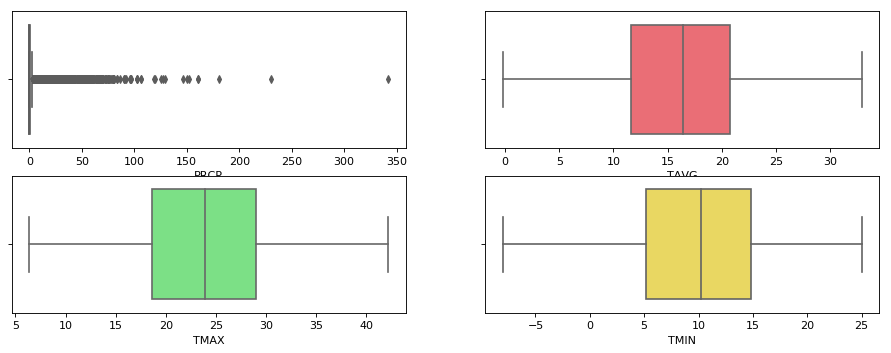

In [19]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1)
seaborn.boxplot(x=df_junin['PRCP'], color=BLUE)
#plt.figure(figsize=(5,4))
plt.subplot(2, 2, 2)
seaborn.boxplot(x=df_junin['TAVG'], color=RED)
#plt.figure(figsize=(5,4))
plt.subplot(2, 2, 3)
seaborn.boxplot(x=df_junin['TMAX'], color=GREEN)
plt.subplot(2, 2, 4)
seaborn.boxplot(x=df_junin['TMIN'], color=YELLOW)

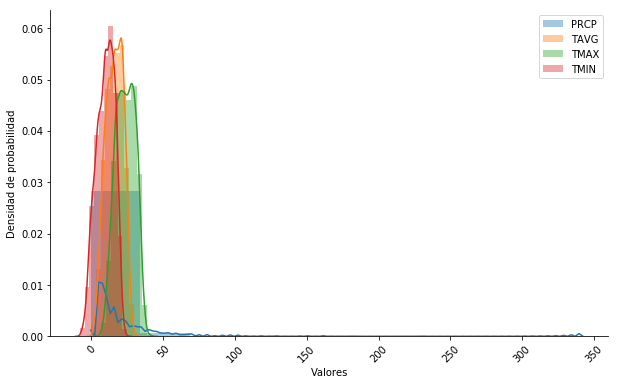

In [20]:
plt.figure(figsize=(10,6))
seaborn.distplot(df_junin['PRCP'].dropna(), bins=10, label='PRCP')
seaborn.distplot(df_junin['TAVG'].dropna(), bins=10, label='TAVG')
seaborn.distplot(df_junin['TMAX'].dropna(), bins=10, label='TMAX')
seaborn.distplot(df_junin['TMIN'].dropna(), bins=10, label='TMIN')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valores')
plt.legend()
seaborn.despine()

In [21]:
df_junin['PRCP'].describe()

count    9744.000000
mean        4.008087
std        12.347039
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       341.900000
Name: PRCP, dtype: float64

Como se puede observar el porcentaje de valores nulos para cada medicion arranca como minimo en 17% y llega hasta un 58%
siendo cantidades grandes para por ejemplo decidir reemplazar los mismos por el valor pronmedio de cada medicion. Por lo que se decide no reemplazar ningun valor nulo.
Tambien se puede observar en los grafico de caja que la unica medicion que posee varios outliers es la 'PRCP', por lo que sera la unica columna saneada. Se eliminaran todas las mediciones que esten por a +/-3 desviaciones estandares  pertenecientes a la medicion 'PRCP'.

In [26]:
#prcp = df_junin['PRCP']
# Eliminar filas a más de 3 desviaciones estándares de la media
#mask_prcp = numpy.abs(prcp-df_junin.PRCP.mean()) <= (3*df_junin.PRCP.std())
#data = prcp[mask_prcp]
outliers = df_junin[(df_junin.PRCP > (df_junin.PRCP.mean() + 3*df_junin.PRCP.std()))
                    & ((df_junin.PRCP_ATTRIBUTES==',,S') | (df_junin.PRCP_ATTRIBUTES=='D,,S')) ]
print("Filas a ser removidas", outliers.PRCP.count())
df_junin.drop(outliers.index, inplace=True)

Filas a ser removidas 218


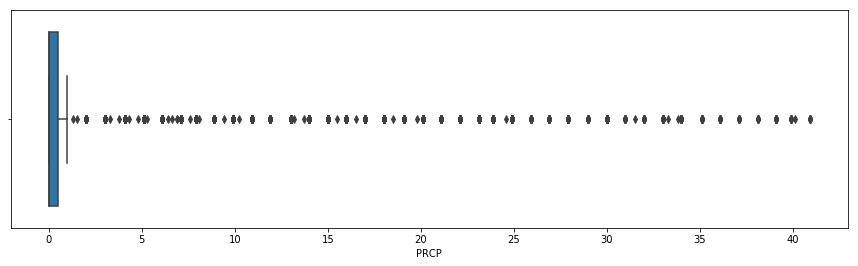

In [27]:
plt.figure(figsize=(15,4))
seaborn.boxplot(x=df_junin['PRCP'])

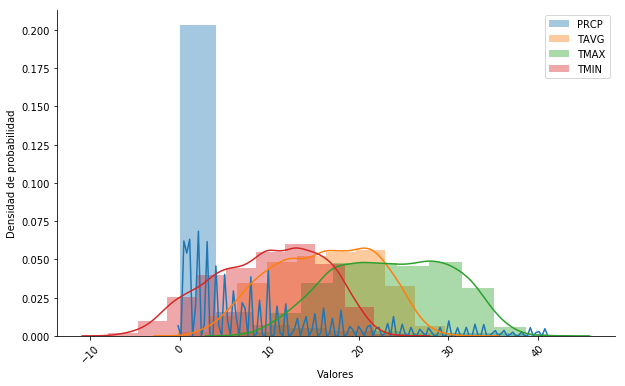

In [28]:
plt.figure(figsize=(10,6))
seaborn.distplot(df_junin['PRCP'].dropna(), bins=10, label='PRCP')
seaborn.distplot(df_junin['TAVG'].dropna(), bins=10, label='TAVG')
seaborn.distplot(df_junin['TMAX'].dropna(), bins=10, label='TMAX')
seaborn.distplot(df_junin['TMIN'].dropna(), bins=10, label='TMIN')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valores')
plt.legend()
seaborn.despine()

In [29]:
df_junin['PRCP'].describe()

count    9526.000000
mean        2.613363
std         6.705045
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max        40.900000
Name: PRCP, dtype: float64

Los valores por encima de 3 desviaciones estandares en la columna precipitacion (PRCP) en conjunto con los atributos  'D,,S' o ',,S' (la 'S' indica que los valores diarios derivados del sistema global de telecomunicaciones pueden diferir significantemente de los datos diarios verdaderos, particularmente para las precipitaciones) en la columna atributos (PRCP_ATTRIBUTES) son las condiciones que se toman como filtros para eliminar los outliers. Despues de removerlos podemos observar que en el grafico de caja siguen existiendo outliers pero estos estan dentro de la distribucion de probabilidad de las demas columnas (TAVG, TMAX, TMIN) por lo que de eliminarlos tambien estariamos eliminando mediciones
validas para esas columnas.

# Actividades

1) Importar correctamente el archivo 1758536_junin.csv considerando tipos de dato de cada feature

2) Filtrar los registros y features que resulten relevantes

3) Analizar y corregir valores extraños ",,S"

4) Analizar y dar valor a valores nulos/outliers

# Parte 3 (Obtener datos desde una API)

# Actividades

1) Registrarse en la web https://darksky.net/ para obtener el token necesario para consultar su API

2) Siguiendo como ejemplo el notebook API Example consultar la API https://api.darksky.net y obtener datos correspondiente a los años 2015 y 2016

3) Generar un nuevo dataset a partir de los datos (time, summary, temperature, humidity, pressure, windBearing, uvIndex, temperatureMin, temperatureMax)

4) Analizar y dar valor a valores nulos/outliers

# Parte 4 (Obtener datos desde Base de Datos)

1) Siguiendo como ejemplo el notebook MySQL Example conectar a la base de datos provista y obtener los registros de la tabla forecastHistory

2) Analizar los json guardados en el campo data de esta tabla y generar un dataset con los campos (time, summary, temperature, humidity, pressure, windBearing, uvIndex, temperatureMin, temperatureMax)

3) Analizar y dar valor a valores nulos/outliers